#1.Loading data, libraries and functions

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

from __future__ import print_function
import os

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, MaxPool2D, GlobalAveragePooling2D, GlobalMaxPool2D, Lambda, BatchNormalization, Concatenate, AvgPool2D
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow import keras

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from scipy import interp
from itertools import cycle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.python.client import device_lib

In [ ]:
# Linking GoogleDrive + accessing data
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [ ]:
# Verify if subfolders are in TRAIN root folder, 0=Organic, 1=Recyclable, 2=Non Recyclable
DATASET_PATH_TRAIN='gdrive/MyDrive/RSDeepLearning/AssWC/train_27m_0deg_center_bank'
for classes in os.listdir(DATASET_PATH_TRAIN):
  d=os.path.join(DATASET_PATH_TRAIN, classes)
  if os.path.isdir(d):
    print(d)

In [ ]:
# Verify if subfolders are in TEST root folder, 0=Organic, 1=Recyclable, 2=Non Recyclable
DATASET_PATH_TEST='gdrive/MyDrive/RSDeepLearning/AssWC/test_27m_0deg_center_bank'
for classes in os.listdir(DATASET_PATH_TEST):
  d=os.path.join(DATASET_PATH_TEST, classes)
  if os.path.isdir(d):
    print(d)

#2 Preprocessing data

In [ ]:
# Defining image height and width
image_height=224
image_width=224
batch_size=32

In [ ]:
path_train = 'gdrive/MyDrive/RSDeepLearning/AssWC/train_27m_0deg_center_bank'
path_val = 'gdrive/MyDrive/RSDeepLearning/AssWC/test_27m_0deg_center_bank'

In [ ]:
def import_dataset(path_train, path_val, image_height, image_width, batch_size):
  # Creating a training dataset
  ds_train = tf.keras.preprocessing.image_dataset_from_directory(
      path_train,
      labels='inferred',
      label_mode='int',
      color_mode='rgb',
      image_size=(image_height,image_width),
      batch_size=batch_size,
      shuffle=True,
      seed=123,
      interpolation='bilinear'
)
  # Creating a validation dataset
  ds_val = tf.keras.preprocessing.image_dataset_from_directory(
      path_val,
      labels='inferred',
      label_mode='int',
      color_mode='rgb',
      image_size=(image_height,image_width),
      batch_size=batch_size,
      shuffle=True,
      seed=123,
      validation_split=val_split,
      subset='validation',
      interpolation='bilinear'
) 
  
  return ds_train, ds_val

In [ ]:
ds_train, ds_val=import_dataset(path_train, path_val, image_height, image_width, batch_size)

In [ ]:
def plot_results_loss(r, training_title, label_name_loss, label_name_val_loss, colors):
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()

  plt.figure(figsize=(15,8))

  for key,c in zip(r, colors):
    plt.plot(r[key].history['loss'], label= f'{label_name_loss}: {key}', color=c)
    plt.plot(r[key].history['val_loss'], label=f'{label_name_val_loss}: {key}', ls= '--', color=c)
  
  plt.xlabel('Epochs')
  plt.ylabel('Loss [-]')
  plt.title(training_title, fontsize=16, fontweight= 'bold')
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
def plot_results_acc(r, training_title, label_name_acc, label_name_val_acc, colors):
  import matplotlib.pyplot as plt
  import seaborn as sns
  sns.set()

  plt.figure(figsize=(15,8))

  for key,c in zip(r, colors):
    plt.plot(r[key].history['accuracy'], label= f'{label_name_acc}: {key}', color=c)
    plt.plot(r[key].history['val_accuracy'], label=f'{label_name_val_acc}: {key}', ls= '--', color=c)
  
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy [-]')
  plt.title(training_title, fontsize=16, fontweight= 'bold')
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title, fontsize=20, fontweight='bold')
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

#3 Visualization of data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


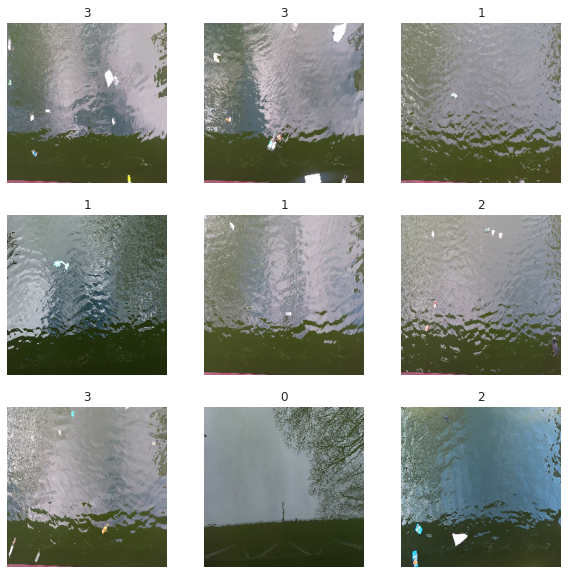

In [ ]:
# Visualizing the TRAIN + VAL DATA
class_names_train = ds_train.class_names

plt.figure(figsize=(10, 10))
for images, labels in ds_train.take(2):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1) 
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names_train[labels[i]])
    plt.axis("off")

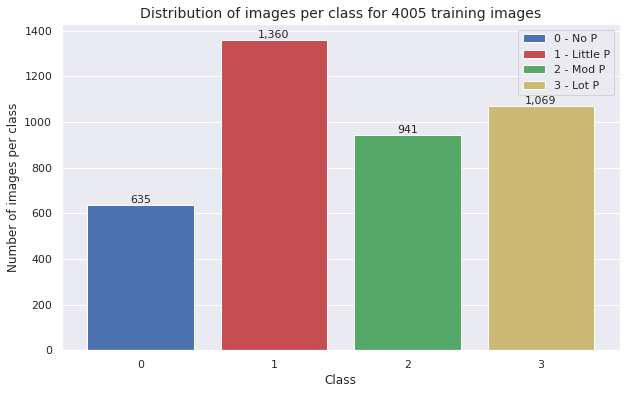

In [ ]:
path = 'gdrive/MyDrive/RSDeepLearning/AssWC/train_27m_0deg_center_bank'
folders = os.listdir('gdrive/MyDrive/RSDeepLearning/AssWC/train_27m_0deg_center_bank') # dir is your directory path
num = []

for folder in folders:
    dir = path + '/' + str(folder)
    onlyfiles = next(os.walk(dir))[2] #dir is your directory path as string
    num.append(len(onlyfiles))
    
fig = plt.figure(figsize=(10,6))
classes = ['0', '1', '2', '3']
values = [0, 1, 2, 3]

axes = sns.barplot(x=values, y=num, palette='bright')

for bar, frequency in zip(axes.patches, num):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height()
    text = f'{frequency:,}'
    axes.text(text_x, text_y, text,fontsize=11,   ha='center', va='bottom')

plt.bar(classes[0], num[0], color='b', label='0 - No P')
plt.bar(classes[1], num[1], color='r', label='1 - Little P')
plt.bar(classes[2], num[2], color='g', label='2 - Mod P')
plt.bar(classes[3], num[3], color='y', label='3 - Lot P')
plt.ylabel('Number of images per class')
plt.xlabel('Class')
plt.title(f'Distribution of images per class for {np.sum(num)} training images', fontsize=14)
plt.legend()
plt.show()

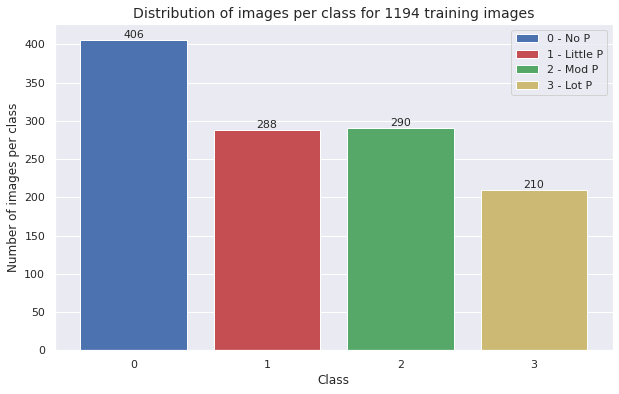

In [ ]:
path = 'gdrive/MyDrive/RSDeepLearning/AssWC/test_27m_0deg_center_bank'
folders = os.listdir('gdrive/MyDrive/RSDeepLearning/AssWC/test_27m_0deg_center_bank') # dir is your directory path
num = []

for folder in folders:
    dir = path + '/' + str(folder)
    onlyfiles = next(os.walk(dir))[2] #dir is your directory path as string
    num.append(len(onlyfiles))
    
fig = plt.figure(figsize=(10,6))
classes = ['0', '1', '2', '3']
values = [0, 1, 2, 3]

axes = sns.barplot(x=values, y=num, palette='bright')

for bar, frequency in zip(axes.patches, num):
    text_x = bar.get_x() + bar.get_width() / 2.0  
    text_y = bar.get_height()
    text = f'{frequency:,}'
    axes.text(text_x, text_y, text,fontsize=11,   ha='center', va='bottom')

plt.bar(classes[0], num[0], color='b', label='0 - No P')
plt.bar(classes[1], num[1], color='r', label='1 - Little P')
plt.bar(classes[2], num[2], color='g', label='2 - Mod P')
plt.bar(classes[3], num[3], color='y', label='3 - Lot P')
plt.ylabel('Number of images per class')
plt.xlabel('Class')
plt.title(f'Distribution of images per class for {np.sum(num)} validation images', fontsize=14)
plt.legend()
plt.show()

#4 Increase of data performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

ds_train = ds_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
ds_val = ds_val.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
tf.test.gpu_device_name()
device_lib.list_local_devices()

#5 Model with VGG as baseline

##5.1 Addressing class imbalance

In [ ]:
path = 'gdrive/MyDrive/RSDeepLearning/AssWC/train_27m_0deg_center_bank'
folders = os.listdir('gdrive/MyDrive/RSDeepLearning/AssWC/train_27m_0deg_center_bank') # dir is your directory path
num = []

for folder in folders:
    dir = path + '/' + str(folder)
    onlyfiles = next(os.walk(dir))[2] #dir is your directory path as string
    num.append(len(onlyfiles))

total_img=np.sum(num)

In [ ]:
num_classes=4
class_weight_train = {0: (total_img/num[0])/num_classes,
                1: (total_img/num[1])/num_classes,
                2: (total_img/num[2])/num_classes,
                3: (total_img/num[3])/num_classes}

In [ ]:
class_weight_train

##5.2 Configuration of Convolutional + Pooling layers

###5.2.1 Different convolutional block configurations

In [ ]:
def model_vgg(vgg_method):

  """
  The parameter vgg_method defines the configuration of the convolutional blocks that are applied. In total there are 5 combinations.
  Arguments: 'VGG1', 'VGG2', 'VGG3', 'VGG4', 'VGG5'
  """
  num_classes = 4

  if vgg_method=='VGG1':
    model = keras.Sequential([
      tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(num_classes, activation='softmax')
  ])
    
    return model

  if vgg_method=='VGG2':
    model = keras.Sequential([
      tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(num_classes, activation='softmax')
  ])
    
    return model

  if vgg_method=='VGG3':
    model = keras.Sequential([
      tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(num_classes, activation='softmax')
  ])
    
    return model

  if vgg_method=='VGG4':
    model = keras.Sequential([
      tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(num_classes, activation='softmax')
  ])
    
    return model

  if vgg_method=='VGG5':
    model = keras.Sequential([
      tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
      keras.layers.Conv2D(8, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(num_classes, activation='softmax')
  ])
    
    return model

In [ ]:
vggs = ['VGG1', 'VGG2', 'VGG3', 'VGG4', 'VGG5']
r_vggs = dict()

for vgg in vggs:
  print(f'Training model with VGG = {vgg}')
  model=model_vgg(vgg_method=vgg)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  r_vggs[vgg] = model.fit(ds_train, validation_data=ds_val, epochs=30, class_weight=class_weight_train)
  err, acc = model.evaluate(ds_val)
  print(f'Model with VGG configuration = {vgg} has a test loss of {round(err, 2)} and an accuracy of {round(acc*100, 2)}%')

In [ ]:
plot_results_loss(r_vggs, 'Training and validation loss for different VGG models', 'Train loss', 'Val loss', ['b', 'g', 'r', 'c', 'm'])

In [ ]:
plot_results_acc(r_vggs, 'Training and validation accuracy for different VGG models', 'Train acc', 'Val acc', ['lightseagreen', 'deeppink', 'olive', 'orange', 'lime'])

In [ ]:
for vgg in vggs:
  val_acc = round(np.max(r_vggs[vgg].history['val_accuracy'])*100, 2)
  val_loss = round(np.min(r_vggs[vgg].history['val_loss']), 2)
  print(f'The best validation accuracy of {vgg} is {val_acc}% and validation loss is {val_loss}')

###5.2.2 Max or Average pooling

In [ ]:
def hybrid_pool_layer():
    def apply(x):
        return Concatenate()([
                MaxPool2D()(x),
                AvgPool2D()(x)])
    return apply

In [ ]:
def model_pooling(pooling):

  """
  The parameter vgg_method defines the configuration of the convolutional blocks that are applied. In total there are 5 combinations.
  Arguments: 'Max Pooling', 'Average Pooling'
  """
 
  num_classes=4

  if pooling=='Max Pooling':
    model = keras.Sequential([
      tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.MaxPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(num_classes, activation='softmax')
  ])
    
    return model

  if pooling=='Average Pooling':
    model = keras.Sequential([
      tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.AvgPool2D(),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.AvgPool2D(),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.AvgPool2D(),
      keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.AvgPool2D(),
      keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'),
      keras.layers.AvgPool2D(),
      keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(num_classes, activation='softmax')
  ])
    
    return model

  if pooling=='Hybrid Pooling': 
    i = Input(shape=(image_height, image_width, 3))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(i)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = hybrid_pool_layer()(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = hybrid_pool_layer()(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = hybrid_pool_layer()(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = hybrid_pool_layer()(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = hybrid_pool_layer()(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(i, x)  

    return model

In [ ]:
pools = ['Max Pooling', 'Average Pooling', 'Hybrid Pooling']
r_pool = dict()

for pool in pools:
  print(f'Training model with pooling method = {pool}')
  model=model_pooling(pooling=pool)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  r_pool[pool] = model.fit(ds_train, validation_data=ds_val, epochs=30, class_weight=class_weight_train)

In [ ]:
plot_results_loss(r_pool, 'Training and validation loss for different pooling methods', 'Train loss', 'Val loss', ['b', 'g', 'r', 'c', 'm'])

In [ ]:
plot_results_acc(r_pool, 'Training and validation accuracy for different pooling methods', 'Train acc', 'Val acc', ['lightseagreen', 'deeppink', 'olive', 'orange', 'lime'])

In [ ]:
for pool in pools:
  val_acc = round(np.max(r_pool[pool].history['val_accuracy'])*100, 2)
  val_loss = round(np.min(r_pool[pool].history['val_loss']), 2)
  print(f'The best validation accuracy of {pool} is {val_acc}% and validation loss is {val_loss}')

##5.3 Assessment of regularization techniques (BatchNorm + Dropout), Dense layers, Global Max+Average Pooling and batch sizes

###5.3.1 Batch Normalization

In [ ]:
def model_batchnorm(momentum):


  """
  
  """
  num_classes = 4
  i = Input(shape=(image_height, image_width, 3))
  x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(i)
  x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=momentum)(x)
  x = MaxPool2D()(x)
  x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=momentum)(x)
  x = MaxPool2D()(x)
  x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=momentum)(x)
  x = MaxPool2D()(x)
  x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=momentum)(x)
  x = MaxPool2D()(x)
  x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=momentum)(x)
  x = MaxPool2D()(x)
  x = Flatten()(x)
  x = Dense(128, activation='relu')(x)
  x = Dense(num_classes, activation='softmax')(x)

  model = Model(i,x)

  
  return model

In [ ]:
momentums = [0.5, 0.6, 0.7, 0.8, 0.9]
r_batch32 = dict()

for momentum in momentums:
  print(f'Training model with momentum = {momentum} for batch size = 32')
  model = model_batchnorm(momentum=momentum)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  r_batch32[momentum] = model.fit(ds_train, validation_data=ds_val, epochs=30, class_weight=class_weight_train)

In [ ]:
plot_results_loss(r_batch32, 'Training and validation loss for batch size=32 and different momentum', 'Train loss', 'Val loss', ['b', 'g', 'r', 'c', 'm', 'lime', 'magenta'])

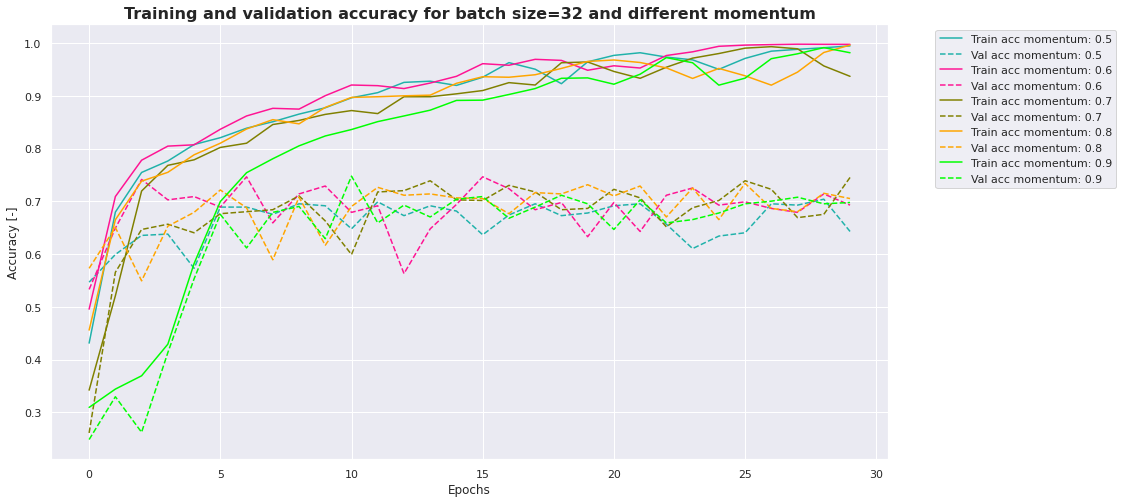

In [ ]:
plot_results_acc(r_batch32, 'Training and validation accuracy for batch size=32 and different momentum', 'Train acc momentum', 'Val acc momentum', ['lightseagreen', 'deeppink', 'olive', 'orange', 'lime', 'black'])

In [ ]:
momentums = [0.5, 0.6, 0.7, 0.8, 0.9]
for momentum in momentums:
  val_acc = round(np.max(r_batch32[momentum].history['val_accuracy'])*100, 2)
  val_loss = round(np.min(r_batch32[momentum].history['val_loss']), 2)
  print(f'The best validation accuracy of {momentum} is {val_acc}% and validation loss is {val_loss}')

###5.3.2 Dropout

In [ ]:
def model_dropout(dp_value):

  """
  
  """
  num_classes = 4

  i = Input(shape=(image_height, image_width, 3))
  x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(i)
  x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Flatten()(x)
  x = Dropout(dp_value)(x)
  x = Dense(128, activation='relu')(x)
  x = Dropout(dp_value)(x)
  x = Dense(num_classes, activation='softmax')(x)

  model = Model(i,x)
  
  return model

In [ ]:
dropouts = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
r_dropout32 = dict()

for dropout in dropouts:
  print(f'Training model with dropout = {dropout} for batch size = 32')
  model = model_dropout(dp_value=dropout)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  r_dropout32[dropout] = model.fit(ds_train, validation_data=ds_val, epochs=30, class_weight=class_weight_train)

In [ ]:
plot_results_loss(r_dropout32, 'Training and validation loss for different dropout values', 'Train loss Dropout', 'Val loss Dropout', ['b', 'g', 'r', 'c', 'm', 'black'])

In [ ]:
plot_results_acc(r_dropout32, 'Training and validation accuracy for different dropout values', 'Train acc Dropout', 'Val acc Dropout', ['lightseagreen', 'deeppink', 'olive', 'orange', 'lime', 'black', 'yellow'])

In [ ]:
for dropout in dropouts:
  val_acc = round(np.max(r_dropout32[dropout].history['val_accuracy'])*100, 2)
  val_loss = round(np.min(r_dropout32[dropout].history['val_loss']), 2)
  print(f'The best validation accuracy of {dropout} is {val_acc}% and validation loss is {val_loss}')

###5.3.3 Global Average Pooling, Global Max Pooling and combination

In [ ]:
def hybrid_global_pool_layer():
    def apply(x):
        return Concatenate()([
                GlobalMaxPool2D()(x),
                GlobalAveragePooling2D()(x)])
    return apply

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [ ]:
def model_global(global_def):

  """
  The parameter global_def defines whether max pool+flatten, global average pooling or global max pooling are applied.

  Arguments: 'Flatten', 'Global Average', 'Global Max', 'Global Avg+Max'
  """
  num_classes = 4

  if global_def=='Flatten':

    i = Input(shape=(image_height, image_width, 3))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(i)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = Dropout(0.5)(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(i,x)
    
    return model

  if global_def=='Global Average':

    i = Input(shape=(image_height, image_width, 3))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(i)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(i,x)
    
    return model

  if global_def=='Global Max':

    i = Input(shape=(image_height, image_width, 3))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(i)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = GlobalMaxPool2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(i,x)
    
    return model
    
  if global_def=='Global Avg+Max':

    i = Input(shape=(image_height, image_width, 3))
    x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(i)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = MaxPool2D()(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
    x = BatchNormalization(momentum=0.6)(x)
    x = hybrid_global_pool_layer()(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(num_classes, activation='softmax')(x)

    model = Model(i,x)

    return model

In [ ]:
globals = ['Flatten', 'Global Average', 'Global Max', 'Global Avg+Max']
r_globals = dict()


for glob in globals:
  print(f'Training model with {glob} layer')
  model = model_global(global_def=glob)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  r_globals[glob] = model.fit(ds_train, validation_data=ds_val, epochs=30, class_weight=class_weight_train)

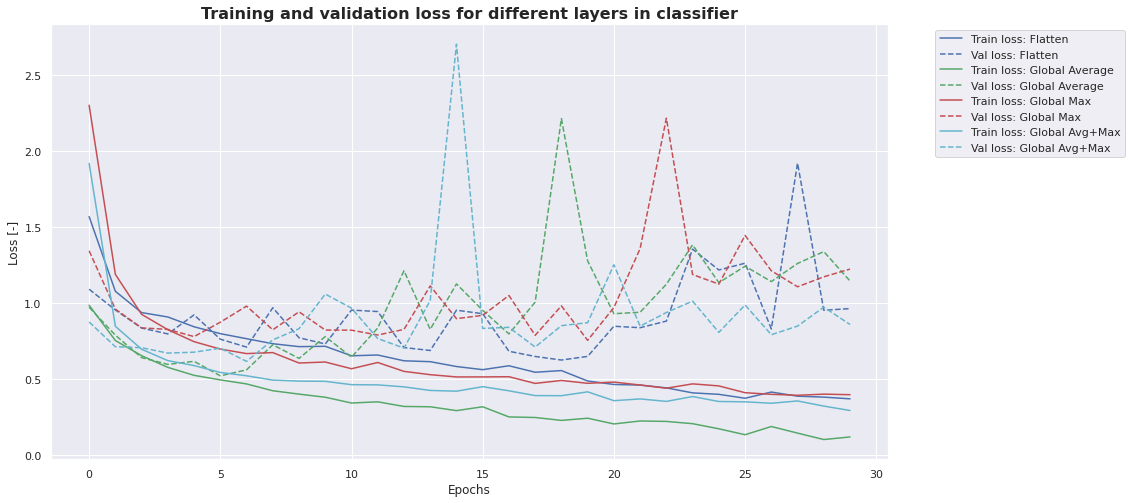

In [ ]:
plot_results_loss(r_globals, 'Training and validation loss for different layers in classifier', 'Train loss', 'Val loss', ['b', 'g', 'r', 'c', 'm'])

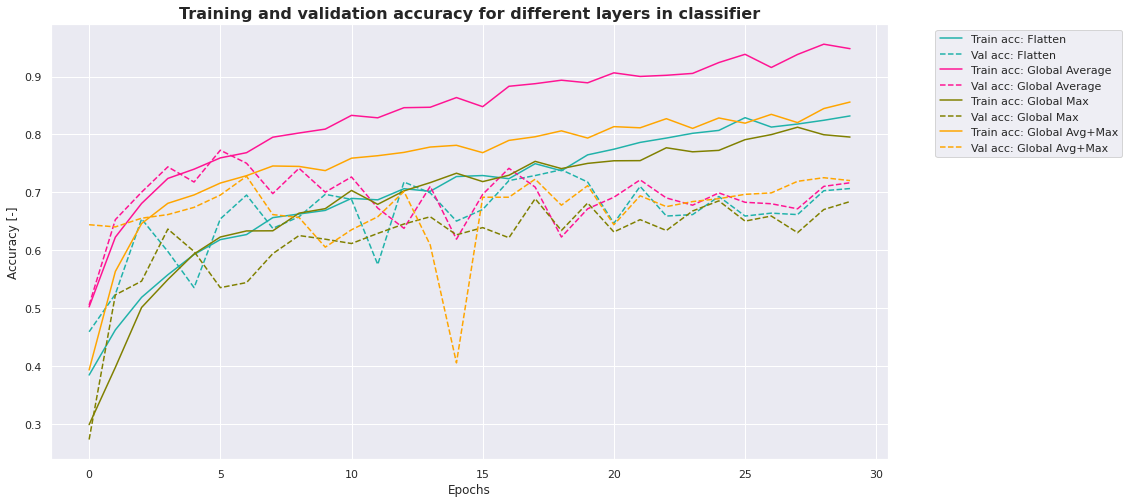

In [ ]:
plot_results_acc(r_globals, 'Training and validation accuracy for different layers in classifier', 'Train acc', 'Val acc', ['lightseagreen', 'deeppink', 'olive', 'orange', 'lime'])

In [ ]:
for glob in globals:
  val_acc = round(np.max(r_globals[glob].history['val_accuracy'])*100, 2)
  val_loss = round(np.min(r_globals[glob].history['val_loss']), 2)
  print(f'The best validation accuracy of {glob} is {val_acc}% and validation loss is {val_loss}')

###5.3.4 Dense layers

In [ ]:
def model_dense(dense1, dense2):

  """
  
  """
  num_classes = 4

  i = Input(shape=(image_height, image_width, 3))
  x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(i)
  x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.5)(x)
  x = Dense(dense1, activation='relu')(x)
  x = Dense(dense2, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(num_classes, activation='softmax')(x)

  model = Model(i,x)
  
  return model

In [ ]:
denses = [32, 64, 128, 256, 512]
r_denses = dict()

for dense in denses:
  print(f'Training model with {dense} neurons in 1st and 2nd layer')
  model = model_dense(dense1=dense, dense2=dense)
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
  r_denses[dense] = model.fit(ds_train, validation_data=ds_val, epochs=30, class_weight=class_weight_train)

In [ ]:
plot_results_acc(r_denses, 'Training and validation accuracy for different number of neurons in dense layers', 'Train acc # neurons', 'Val acc # neurons', ['lightseagreen', 'deeppink', 'olive', 'orange', 'lime'])

In [ ]:
plot_results_loss(r_denses, 'Training and validation loss for different number of neurons in dense layers', 'Train loss # neurons', 'Val loss # neurons', ['b', 'g', 'r', 'c', 'm'])

#6 Final model from scratch CNN


##6.1 Model structure

In [ ]:
  num_classes = 4

  i = Input(shape=(image_height, image_width, 3))
  x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(i)
  x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(16, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(32, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = MaxPool2D()(x)
  x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
  x = BatchNormalization(momentum=0.6)(x)
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.5)(x)
  x = Dense(64, activation='relu')(x)
  x = Dense(256, activation='relu')(x)
  x = Dropout(0.5)(x)
  x = Dense(num_classes, activation='softmax')(x)

  model = Model(i, x)

In [ ]:
  model.summary()

##6.2 Model training

In [ ]:
mcp_save = ModelCheckpoint('gdrive/MyDrive/RSDeepLearning/AssWC/mdl_wts.hdf5', save_best_only=True, monitor='val_accuracy', mode='auto', save_weights_only=True)  # we keep saving the best model weights based on validation accuracy

# list together
callbacks = [mcp_save] 

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
r=model.fit(ds_train, validation_data=ds_val, epochs=30,  callbacks=callbacks, class_weight=class_weight_train)

##6.3 Confusion Matrix

In [ ]:
y_true = np.concatenate([y for x, y in ds_val], axis=0)
x_val = np.concatenate([x for x, y in ds_val], axis=0)
y_pred = model.predict(ds_val).argmax(axis=1)
plt.figure(figsize=(8,8))
plt.grid(False)
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, list(range(num_classes)))

##6.4 Statistics (Precision, Recall, F1 score, ROC/AUC curve)

In [ ]:
# Precision, Recall and F1 score
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

**ROC and AUC**

For each class, we take it as the positive class and group the rest classes together as the negative class.

Class 0 vs classes 1&2
Class 1 vs classes 0&2
Class 2 vs classes 0&1

In [ ]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
y_pred = model.predict(ds_val)
y_true = y_true.reshape(len(y_true), 1)
y_true_onehot = onehot_encoder.fit_transform(y_true)
y_true_onehot = np.array(y_true_onehot)

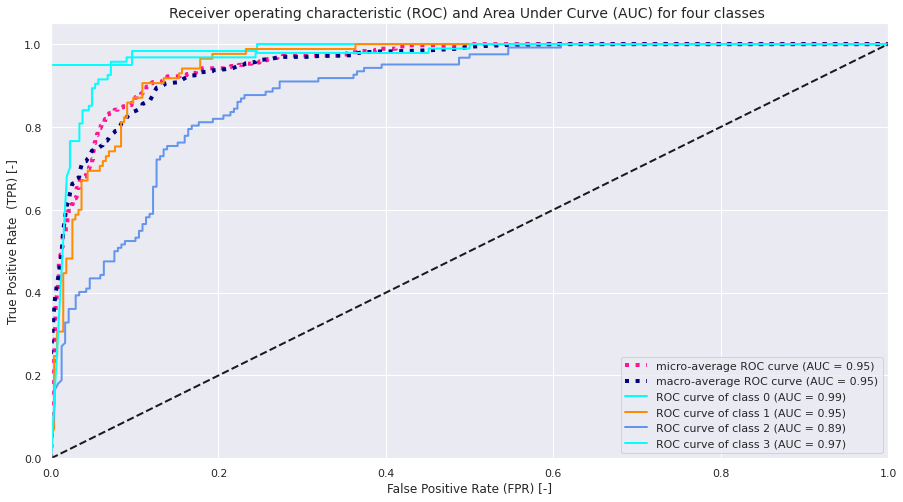

In [ ]:
import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import seaborn as sns
sns.set()

# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_onehot[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_onehot.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(15,8))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (AUC = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(num_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR) [-]')
plt.ylabel('True Positive Rate  (TPR) [-]')
plt.title('Receiver operating characteristic (ROC) and Area Under Curve (AUC) for four classes ', fontsize=14)
plt.legend(loc="lower right")
plt.show();

##6.5 Training/Validation loss/accuracy for final CNN model

In [ ]:
f, ax = plt.subplots(1,2,figsize=(25,7))
ax[0].plot(r.history['loss'], label = 'Train loss', color = 'b')
ax[0].plot(r.history['val_loss'], label = 'Validation loss', color = 'g', ls= '--')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss [-]')
ax[0].set_title('Training and validation loss for final CNN model with all training images', fontsize=14)
ax[0].legend()
ax[1].plot(r.history['accuracy'], label = 'Train accuracy', color = 'b')
ax[1].plot(r.history['val_accuracy'], label = 'validation accuracy', color = 'g', ls= '--')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy [-]')
ax[1].set_title('Training and validation accuracy for final CNN model with all training images', fontsize=14)
ax[1].legend();

##6.6 Misclassified examples

In [ ]:
# label mapping
labels = '''No 
Little 
Moderate 
Lot'''.split()

In [ ]:
x_val=x_val/255.0

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_true)[0]
i = np.random.choice(misclassified_idx)
plt.figure(figsize=(10,8))
plt.grid(False)
plt.imshow(x_val[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_true[i]], labels[y_pred[i]]));

#7 Visualization of Feature Maps

In [ ]:
num_classes=4
model_featuremaps = keras.Sequential([
  keras.layers.Conv2D(4, (3,3), strides=1, activation='relu', padding='same', input_shape=(224,224,3)),
  keras.layers.MaxPool2D(),
  keras.layers.Conv2D(8, (3,3), strides=1, activation='relu', padding='same'), 
  keras.layers.MaxPool2D(),
  keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'),
  keras.layers.MaxPool2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model_featuremaps.summary()

In [ ]:
# Defining the layer output and feature map model
layer_outputs = [layer.output for layer in model_featuremaps.layers]
feature_map_model = tf.keras.models.Model(inputs=model_featuremaps.input, outputs=layer_outputs)

In [ ]:
# Loading in the image and reshaping it
from tensorflow.keras.preprocessing.image import img_to_array, load_img
image_path= r"gdrive/MyDrive/RSDeepLearning/AssWC/exp54_836_similar.jpg"
img = load_img(image_path, target_size=(224, 224))  
x = img_to_array(img)                           
x = x.reshape(1, 224, 224, 3)                 
x /= 255.0

In [ ]:
# Checking model layers
layer_names=[layer.name for layer in model_featuremaps.layers]
print(layer_names)

In [ ]:
# Model predictiong
feature_maps=feature_map_model.predict(x)

In [ ]:
feature_map_model.summary()

In [ ]:
# Checking the shape of the layers
for layer_name, feature_map in zip(layer_names, feature_maps):
  print(f"The shape of the {layer_name} is =======>> {(feature_map.shape)}")

In [ ]:
# Visualization of the feature maps per layer which has a length = 4
for layer_name, feature_map in zip(layer_names, feature_maps):
  if len(feature_map.shape) == 4:
    channels=feature_map.shape[-1]  
    size=feature_map.shape[1]
    display_grid=np.zeros((size, size*channels))
    for i in range(channels):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x  
      
    scale = 20. / channels
    plt.figure(figsize=(scale * channels, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, cmap='viridis', aspect='auto')

#8 Fine-Tuning Hyperparameters (Keras Tuner)

In [ ]:
pip install -U keras-tuner

In [ ]:
from kerastuner.tuners import RandomSearch

In [ ]:
def build_model(hp):
  num_classes = 4

  model = keras.models.Sequential()

  model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(image_height, image_width, 3)))

  #for i in range(hp.Int('n2_layers', 1, 1)):
    #model.add(keras.layers.Conv2D(hp.Int(f'conv2_{i}_units', 16, 64, 16), (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'))  
  model.add(keras.layers.Conv2D(16, (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.BatchNormalization(momentum=0.6))  
  model.add(keras.layers.MaxPool2D())

  #for i in range(hp.Int('n3_layers', 1, 1)):
    #model.add(keras.layers.Conv2D(hp.Int(f'conv3_{i}_units', 32, 256, 32), (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'))  
  model.add(keras.layers.Conv2D(32, (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.BatchNormalization(momentum=0.6))  
  model.add(keras.layers.MaxPool2D())

  #for i in range(hp.Int('n4_layers', 1, 1)):
    #model.add(keras.layers.Conv2D(hp.Int(f'conv4_{i}_units', 32, 256, 32), (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(64, (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.BatchNormalization(momentum=0.6)) 
  model.add(keras.layers.MaxPool2D())

  #for i in range(hp.Int('n5_layers', 1, 1)):
    #model.add(keras.layers.Conv2D(hp.Int(f'conv5_{i}_units', 32, 256, 32), (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(128, (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.BatchNormalization(momentum=0.6))
  model.add(keras.layers.MaxPool2D()) 

  #for i in range(hp.Int('n5_layers', 1, 1)):
    #model.add(keras.layers.Conv2D(hp.Int(f'conv5_{i}_units', 32, 256, 32), (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.Conv2D(256, (3,3), strides=1, activation='relu', padding='same'))
  model.add(keras.layers.BatchNormalization(momentum=0.6))
  

  #for i in range(hp.Int('n6_layers', 1, 1)):
    #model.add(keras.layers.Conv2D(hp.Int(f'conv6_{i}_units', 32, 256, 32), (3,3), strides=1, activation='relu', padding='same'))

  model.add(keras.layers.GlobalAveragePooling2D())
  model.add(keras.layers.Dropout(0.5))
  #model.add(keras.layers.Dropout(hp.Choice('drop1', values=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7]))) 
  #keras.layers.Dense(hp.Choice(values=[64, 128, 256, 512]), activation='relu'),
  #keras.layers.Dense(hp.Choice(values=[64, 128, 256, 512]), activation='relu'),
  #keras.layers.Dense(128, activation='relu'),
  #keras.layers.Dense(256, activation='relu'),
  for i in range(hp.Int('n_layers', 1, 4)):
    keras.layers.Dense(hp.Choice('dense1', values=[16, 32, 64, 128, 256, 512]), activation='relu'),
    keras.layers.Dense(hp.Choice('dense2', values=[16, 32, 64, 128, 256, 512]), activation='relu'),
  model.add(keras.layers.Dropout(0.5))
  #model.add(keras.layers.Dropout(hp.Choice('drop2', values=[0.2, 0.3, 0.4, 0.5, 0.6, 0.7])))  
  model.add(keras.layers.Dense(num_classes, activation='softmax'))

  #model.add(keras.layers.GlobalAveragePooling2D())
  #model.add(keras.layers.Dropout(0.2))
  
  #for i in range(hp.Int('n_layers', 1, 4)):
  #keras.layers.Dense(hp.Choice('dense1', values=[16, 32, 64, 128, 256, 512]), activation='relu'),
  #keras.layers.Dense(hp.Choice('dense2', values=[16, 32, 64, 128, 256, 512]), activation='relu'),

  #model.add(keras.layers.Dropout(0.3))
  #model.add(keras.layers.Dense(num_classes, activation='softmax'))

  #hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

  return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=50,
    overwrite=True
    )

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(ds_train,
             validation_data=ds_val,
             epochs=20,
             callbacks=[stop_early],
             class_weight=class_weight_train)

In [ ]:
best_model = tuner.get_best_models(1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

In [ ]:
best_hps.get('learning_rate')

In [ ]:
best_hps.get('dense2')

In [ ]:
best_model.summary()